<a href="https://colab.research.google.com/github/Dilpreet0501/potato-disease-project-ml/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/Dilpreet0501/potato-disease-project-ml.git

Cloning into 'potato-disease-project-ml'...
remote: Enumerating objects: 2168, done.
remote: Total 2168 (delta 0), reused 0 (delta 0), pack-reused 2168
Receiving objects: 100% (2168/2168), 41.13 MiB | 24.00 MiB/s, done.


In [3]:
!pip install -q keras

In [4]:
import keras

In [5]:
import tensorflow as tf
from keras import models,layers
import matplotlib.pyplot as plt



In [6]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50
train_path='/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training/PlantVillage'

In [7]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training')

ds_train=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/training',
                                          shuffle=True,
                                          image_size=(256,256),
                                          batch_size=BATCH_SIZE
                                          )

Found 2152 files belonging to 3 classes.
Found 2152 files belonging to 3 classes.


In [8]:
!pip install tensorflow

In [9]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

In [12]:
!pip install numpy

In [13]:
import numpy

(32, 256, 256, 3)
tf.Tensor([0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 2 0 1 0 2 1 0 1 1 0 0 0 1], shape=(32,), dtype=int32)


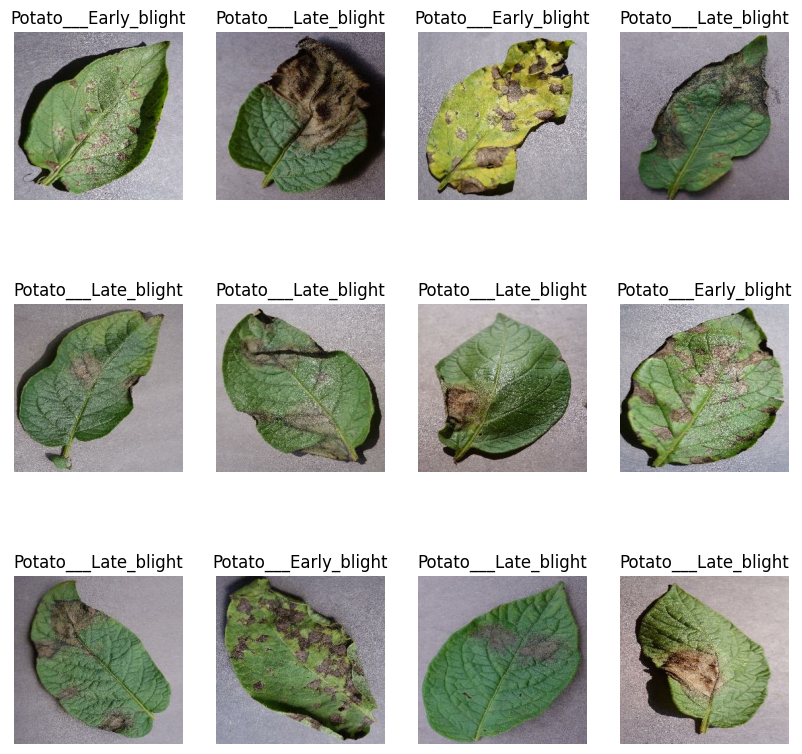

In [14]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in ds_train.take(1):
    print(image_batch.shape)
    print(labels_batch)
    for i in range(12):

      ax=plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")



In [15]:
train_size=0.8
len(ds_train)*train_size

54.400000000000006

In [16]:
trainset=ds_train.take(54)
len(trainset)

54

In [17]:
testset=ds_train.skip(54)
len(testset)

14

In [18]:
val_size=0.1
len(ds_train)*val_size

6.800000000000001

In [19]:
valset=testset.take(6)
len(valset)

6

In [20]:
testset=testset.skip(6)
len(testset)

8

In [21]:
def get_dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+val_split+test_split)==1
    ds_size=len(ds)
    if shuffle:
      ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    trainset=ds.take(train_size)
    valset=ds.skip(train_size).take(val_size)
    testset=ds.skip(train_size).skip(val_size)
    return trainset,valset,testset

In [22]:
trainset,valset,testset=get_dataset_partition(ds_train)

In [23]:
len(trainset)
# has 54 batches=54*32 images

54

In [24]:
len(valset)


6

In [25]:
len(testset)

8

In [26]:
trainset=trainset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valset=valset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testset=testset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
for image_batch in ds_train.take(1):
  print(image_batch[0].numpy()/255)

[[[[0.5568628  0.52156866 0.53333336]
   [0.56078434 0.5254902  0.5372549 ]
   [0.5647059  0.5294118  0.5411765 ]
   ...
   [0.6509804  0.627451   0.63529414]
   [0.6745098  0.6509804  0.65882355]
   [0.68235296 0.65882355 0.6666667 ]]

  [[0.6        0.5647059  0.5764706 ]
   [0.5921569  0.5568628  0.5686275 ]
   [0.5803922  0.54509807 0.5568628 ]
   ...
   [0.64705884 0.62352943 0.6313726 ]
   [0.6666667  0.6431373  0.6509804 ]
   [0.6784314  0.654902   0.6627451 ]]

  [[0.5882353  0.5529412  0.5647059 ]
   [0.58431375 0.54901963 0.56078434]
   [0.5803922  0.54509807 0.5568628 ]
   ...
   [0.654902   0.6313726  0.6392157 ]
   [0.6666667  0.6431373  0.6509804 ]
   [0.67058825 0.64705884 0.654902  ]]

  ...

  [[0.54901963 0.5019608  0.5019608 ]
   [0.61960787 0.57254905 0.57254905]
   [0.52156866 0.4745098  0.4745098 ]
   ...
   [0.70980394 0.6666667  0.68235296]
   [0.5411765  0.49803922 0.5137255 ]
   [0.4745098  0.43137255 0.44705883]]

  [[0.42352942 0.3764706  0.3764706 ]
   [0.4

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

image = Sequential(
[layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.1),
layers.RandomZoom(height_factor=(-0.2,-0.3),width_factor=(-0.2,-0.3),interpolation='bilinear'),
layers.RandomContrast(factor=0.1),
layers.RandomTranslation(height_factor=0.1,width_factor=0.1),
layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
layers.Rescaling(1.0/255)], name="image",
)

In [29]:
from tensorflow.keras import layers, models


n_classes = 3

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Input(shape=input_shape, batch_size=BATCH_SIZE),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 30, 30, 64)          0

In [30]:
model.compile(
   optimizer='adam',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
   metrics=['accuracy']
)

In [31]:
history= model.fit(
    ds_train,
    batch_size=BATCH_SIZE,
    validation_data=valset,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
68/68 [==============================] - 198s 3s/step - loss: 1.0490 - accuracy: 0.6194 - val_loss: 0.5288 - val_accuracy: 0.7679
Epoch 2/50
68/68 [==============================] - 9s 114ms/step - loss: 0.4356 - accuracy: 0.8243 - val_loss: 0.4507 - val_accuracy: 0.8214
Epoch 3/50
68/68 [==============================] - 7s 99ms/step - loss: 0.2554 - accuracy: 0.8954 - val_loss: 0.1705 - val_accuracy: 0.9405
Epoch 4/50
68/68 [==============================] - 8s 114ms/step - loss: 0.1908 - accuracy: 0.9224 - val_loss: 0.1734 - val_accuracy: 0.9524
Epoch 5/50
68/68 [==============================] - 8s 109ms/step - loss: 0.1498 - accuracy: 0.9414 - val_loss: 0.2241 - val_accuracy: 0.8929
Epoch 6/50
68/68 [==============================] - 7s 96ms/step - loss: 0.1188 - accuracy: 0.9554 - val_loss: 0.0441 - val_accuracy: 0.9821
Epoch 7/50
68/68 [==============================] - 7s 96ms/step - loss: 0.1262 - accuracy: 0.9526 - val_loss: 0.1315 - val_accuracy: 0.9524
Epoch 8/50

In [32]:
score=model.evaluate(testset)

8/8 [==============================] - 7s 27ms/step - loss: 3.8027e-05 - accuracy: 1.0000


In [33]:
score

[3.802702121902257e-05, 1.0]

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 68}

In [35]:
history.history['accuracy']

[0.6194238066673279,
 0.8243494629859924,
 0.8954461216926575,
 0.922397792339325,
 0.9414498209953308,
 0.9553903341293335,
 0.952602207660675,
 0.9381970167160034,
 0.9684014916419983,
 0.9716542959213257,
 0.9902416467666626,
 0.9869888424873352,
 0.9670074582099915,
 0.9809479713439941,
 0.9776951670646667,
 0.9725836515426636,
 0.9832713603973389,
 0.99349445104599,
 0.9921003580093384,
 0.9605018496513367,
 0.9888476133346558,
 0.988382875919342,
 0.9498141407966614,
 0.9730483293533325,
 0.9921003580093384,
 0.9948884844779968,
 0.9925650358200073,
 0.9888476133346558,
 0.9851301312446594,
 0.9967471957206726,
 0.9962825179100037,
 0.9930297136306763,
 0.9981412887573242,
 0.9567843675613403,
 0.9776951670646667,
 0.9930297136306763,
 0.9312267899513245,
 0.9674721360206604,
 0.9953531622886658,
 0.9976765513420105,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

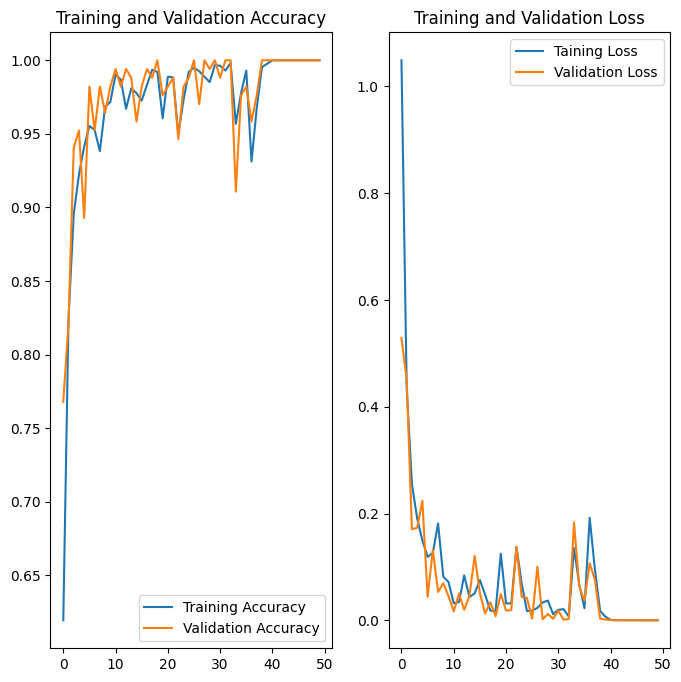

In [37]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss,label='Taining Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label: Potato___healthy
1/1 [==============================] - 0s 128ms/step
Predicted Lable: Potato___healthy


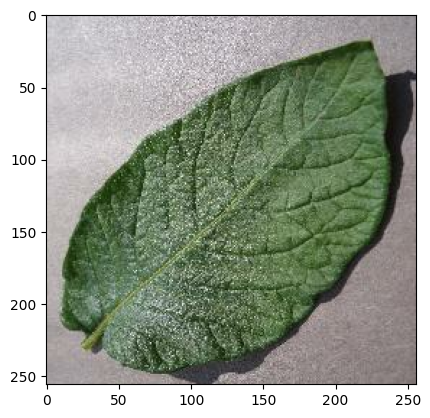

In [38]:
import numpy as np
for image_batch,labels_batch in testset.take(1):
  first_image=image_batch[0].numpy().astype('uint8')
  print("First image to predict")
  plt.imshow(first_image)
  print("Actual Label:",class_names[labels_batch[0].numpy()])
  batch_prediction=model.predict(image_batch)
  print("Predicted Lable:",class_names[np.argmax(batch_prediction[0])])

In [39]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[1].numpy())
  img_array=tf.expand_dims(img_array,0)
  prediction=model.predict(img_array)
  predicted_class=class_names[np.argmax(prediction[0])]
  confidence=round(100*(np.max(prediction[0])),2)
  return predicted_class,confidence


1/1 [==============================] - 0s 19ms/step


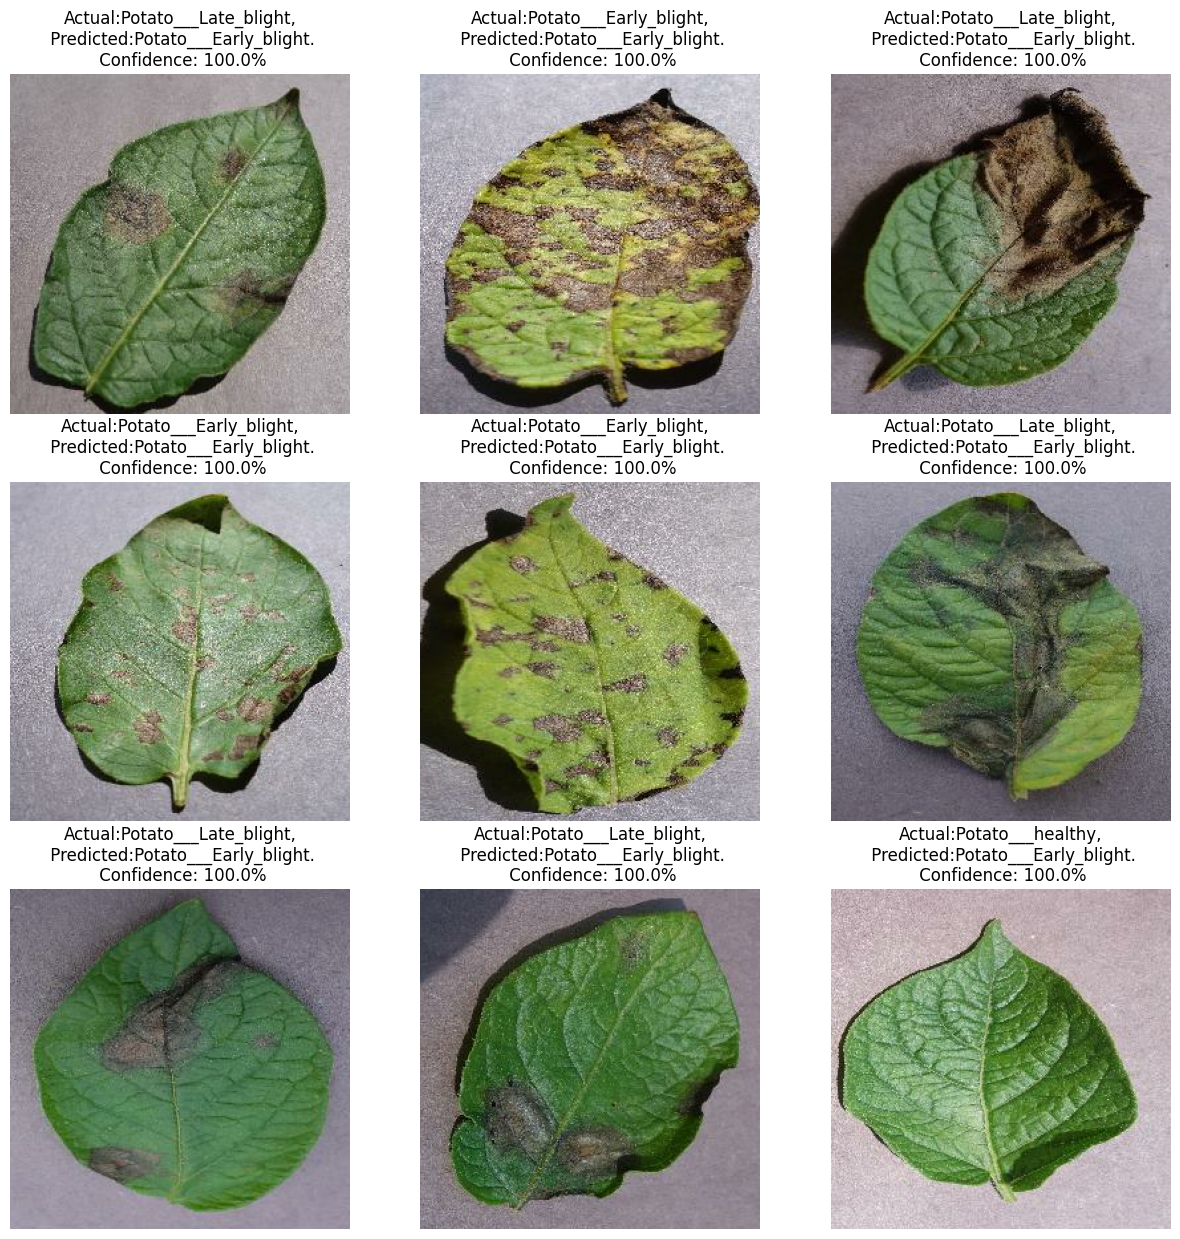

In [40]:
plt.figure(figsize=(15,15))
for images,labels in trainset.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
  plt.show()

In [42]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/potato-project-ML/model_build.hfd5')